In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# import calculation libraries
from scipy.integrate import odeint
from scipy import integrate, optimize


In [2]:
def SEIR(y, t, beta, gamma1, gamma2, alpha, d1, r):
    #unpackage paraments
    S, E, I, R, total_death= y
    #S, E, I, R = y

    # calculte curve
    dS_dt = -beta*S*I*r/N
    dE_dt = beta*S*I*r/N - gamma1*E - alpha*E
    dI_dt = alpha*E - gamma2*I - d1*I
    dR_dt = gamma1*E + gamma2*I

    # the data we want to find
    total_death = d1*E
    #total_confirmed = alpha*E

    # return result
    return([dS_dt, dE_dt, dI_dt, dR_dt, total_death])
    
def fit_odeint(t,beta,gamma1,gamma2,alpha,d1,r):
    re = integrate.odeint(SEIR,[S0,E0,I0,R0,total_death],t,args=(beta,gamma1,gamma2,alpha,d1,r))
    return re[:,-1]

In [3]:
with open ('../data/Iran_prediction','rb') as f:
    data = pickle.load(f)

In [4]:
data_copy = data['Iran']
data_copy 

[[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
         52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
         69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
  array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    2,    2,    4,    5,    8,
           12,   16,   19,   26,   34,   43,   54,   66,   77,   92,  107,
          124,  145,  194,  237,  291,  354,  429,  514,  611,  724,  853,
          988, 1135, 1284, 1433, 1556, 1685, 1812, 1934, 2077, 2234, 2378,
         2517, 2640, 2757, 2898, 3036, 3160, 3294, 3452, 3603, 3739, 3872,
         3993, 4110, 4232, 4357, 4474, 4585, 4683], dtype=int64)],
 [array([ 1,  2,  3,  4, 

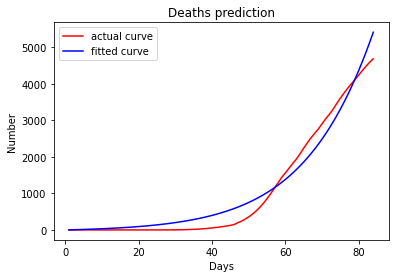

In [5]:
x_data, y_data = data_copy [0][0], data_copy [0][1]
x_data, fitted = data_copy [1][0], data_copy [1][1]
t, fitted2 = data_copy [2][0], data_copy [2][1]

plt.plot(x_data, y_data, color = 'r',label='actual curve')
plt.plot(x_data, fitted, color = 'b',label='fitted curve')
#plt.plot(t, fitted2, color = 'yellow',label='predication curve')
# fitted2 = fit_odeint(t, *popt)
# plt.plot(t, fitted2, color = 'yellow')

plt.title("Deaths prediction")
plt.ylabel("Number")
plt.xlabel("Days")
plt.legend()
plt.show()

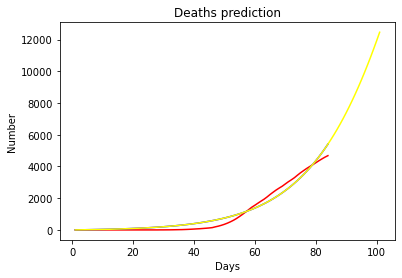

In [6]:
plt.plot(x_data, y_data, color = 'r')
plt.plot(x_data, fitted, color = 'b')
plt.plot(t, fitted2, color = 'yellow')
# fitted2 = fit_odeint(t, *popt)
# plt.plot(t, fitted2, color = 'yellow')

plt.title("Deaths prediction")
plt.ylabel("Number")
plt.xlabel("Days")
plt.show()